In [74]:
import wandb
import copy

runs = wandb.Api().runs('icl-pretraining', filters={
    'State': 'finished',
    'config.run_name': 'eval_copy_6_384_6_mix_1'
})[:1] \
+ wandb.Api().runs('icl-pretraining', filters={
    'State': 'finished',
    'config.run_name': 'eval_copy_9010_6_384_6_mix_1'
})[:1] \
+ wandb.Api().runs('icl-pretraining', filters={
    'State': 'finished',
    'config.run_name': 'eval_copy_1090_6_384_6_mix_1'
})[:1] \
+ wandb.Api().runs('icl-pretraining', filters={
    'State': 'finished',
    'config.run_name': 'eval_bias_add_simple_6_384_6_mix_1'
})[:1] \
+ wandb.Api().runs('icl-pretraining', filters={
    'State': 'finished',
    'config.run_name': 'eval_bias_add_simple_9010_6_384_6_mix_1'
})[:1] \
+ wandb.Api().runs('icl-pretraining', filters={
    'State': 'finished',
    'config.run_name': 'eval_bias_add_simple_1090_6_384_6_mix_1'
})[:1] \
# + wandb.Api().runs('icl-pretraining', filters={
#     'State': 'finished',
#     'config.run_name': 'eval_bias_add_6_384_6_mix_1'
# })[:1]
# + wandb.Api().runs('icl-pretraining', filters={
#     'State': 'finished',
#     'config.run_name': 'eval_bias_add_12_768_12_mix_2'
# })[:1]

run_configs = [run.config for run in runs]
run_summaries = [run.summary._json_dict for run in runs]


In [77]:
import json

json.dump(run_configs, open('run_configs.json', 'w'), indent=2)
json.dump(run_summaries, open('run_summaries.json', 'w'), indent=2)


In [81]:
run_configs = json.load(open('run_configs.json'))
run_summaries = json.load(open('run_summaries.json'))

2
2
2
2
2
2


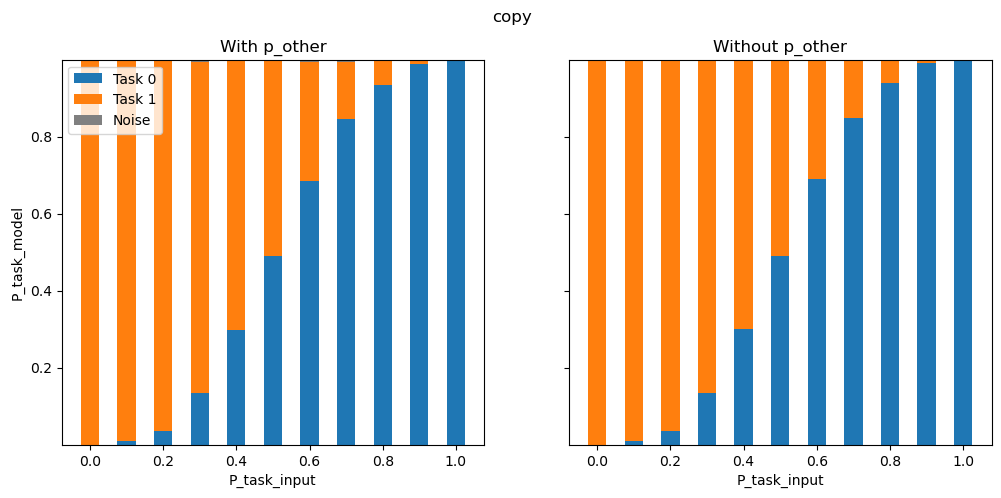

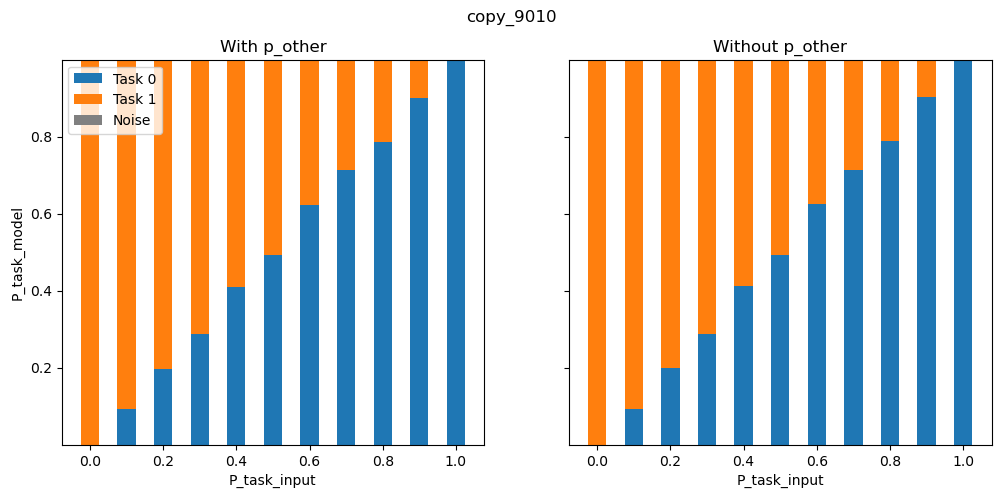

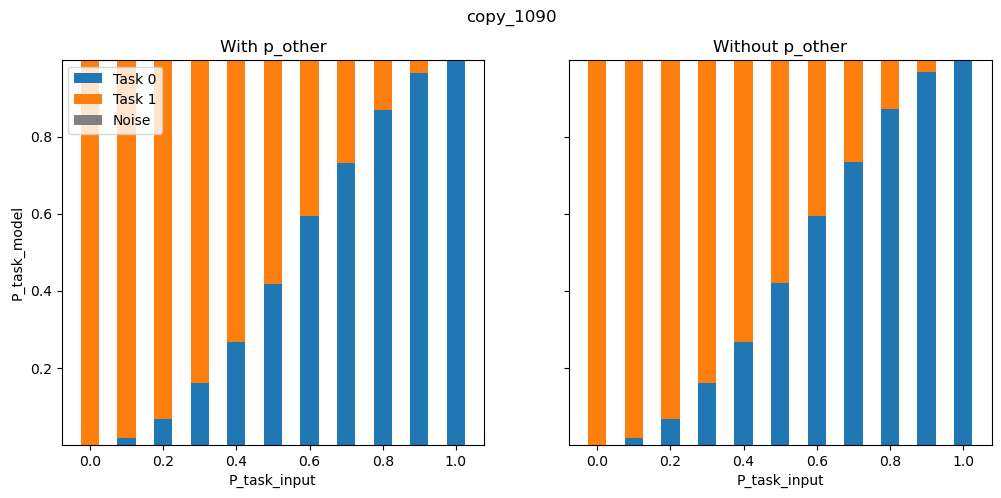

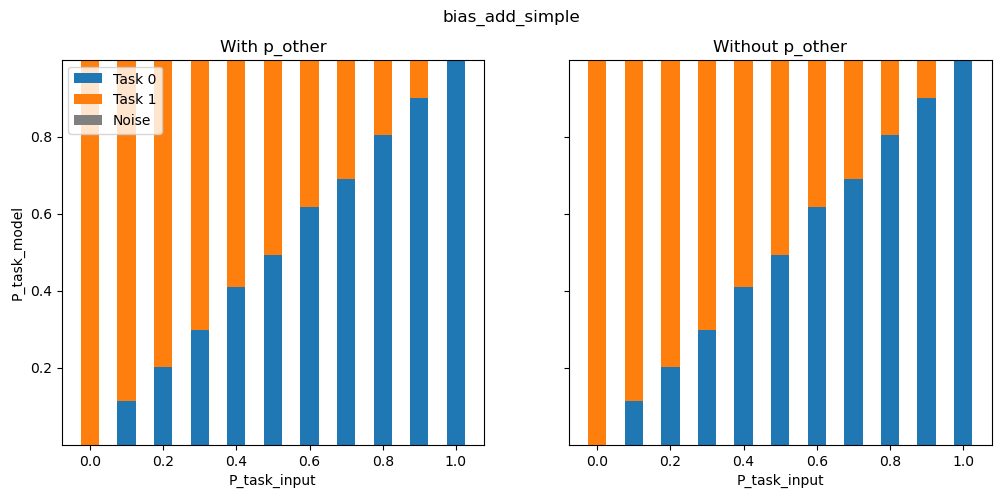

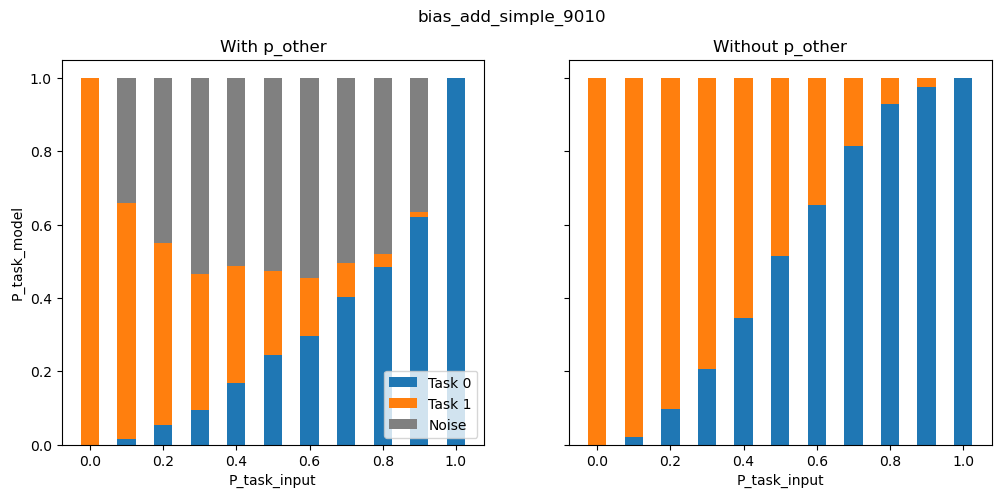

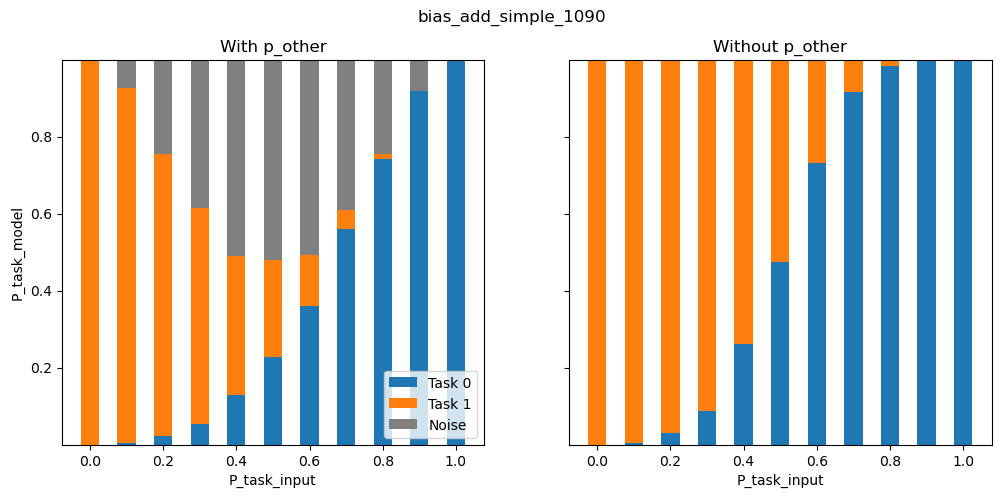

In [82]:
from matplotlib import pyplot as plt
import numpy as np
from seaborn import color_palette

for run_config, run_summary in zip(run_configs, run_summaries):
    config = run_config
    num_tasks = config['num_tasks']
    print(num_tasks)
    x = np.linspace(0, 1, 11)
    dat = np.zeros((x.size, num_tasks))
    for i, mix_prob in enumerate(x):
        task_prob = [run_summary[f'eval/{round(mix_prob, 2)}_ans_prob_mean_{tn}'] for tn in range(num_tasks)]
        dat[i, :] = np.array(task_prob)

    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
    # for task_num in range(dat.shape[1]):
    #     axes[0].bar(x, dat[:, task_num], width=0.05, label=f'Task {task_num}', bottom=dat[:, :task_num].sum(axis=1), color=color_palette(None, num_tasks)[task_num])
    axes[0].bar(x, dat[:, 0], width=0.05, label=f'Task {0}', bottom=dat[:, :0].sum(axis=1), color=color_palette(None, num_tasks)[0])
    axes[0].bar(x, dat[:, 1], width=0.05, label=f'Task {1}', bottom=dat[:, :1].sum(axis=1), color=color_palette(None, num_tasks)[1])
    if dat.shape[1] > 2:
        axes[0].bar(x, dat[:, 2:].sum(axis=1), width=0.05, label=f'Other learned tasks', bottom=dat[:, :2].sum(axis=1), color=color_palette(None, num_tasks)[2])
    axes[0].bar(x, 1 - dat.sum(axis=1), width=0.05, label='Noise', bottom=dat.sum(axis=1), color='grey')

    axes[1].bar(x, dat[:, 0] / dat[:, :2].sum(axis=1), width=0.05, label='Task 0')
    axes[1].bar(x, dat[:, 1] / dat[:, :2].sum(axis=1), width=0.05, label='Task 1', bottom=dat[:, 0] / dat[:, :2].sum(axis=1))
    
    axes[0].set_xlabel('P_task_input')
    axes[0].set_ylabel('P_task_model')
    axes[1].set_xlabel('P_task_input')
    axes[0].set_title('With p_other')
    axes[1].set_title('Without p_other')
    axes[0].legend()
    fig.suptitle(f"{config['task']}")
